#GLACINDIA Workshop
##Part 7: Time series analysis (Pandas)

Nikolay Koldunov

koldunovn@gmail.com

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

## Module import

First we have to import necessary modules:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('max_rows',15) # this limit maximum numbers of rows
np.set_printoptions(precision=3 , suppress= True) # this is just to make the output look better
import seaborn as sns

In [2]:
pd.__version__

'0.15.2'

## Loading data

Now, when we are done with preparations, let's get some data.

Pandas has very good IO capabilities and we are going to use them to load our data and convert it to the time series:

In [3]:
tmax = pd.read_csv('../05_numpy/DelhiTmax.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)

Here we read our data from file, telling pandas, that delimiter is a space, that it has to combine information in the 0th, 1st and 2nd columns and try to understand it as a date, and that there is no header presented in the original data.

In [4]:
tmax.head(3)

,0_1_2,3
0,1944-01-01,22.2
1,1944-01-03,23.9
2,1944-01-04,22.2


Rename columns:

In [5]:
tmax.columns = ['Date', 'Temp']

In [6]:
tmax.head(3)

,Date,Temp
0,1944-01-01,22.2
1,1944-01-03,23.9
2,1944-01-04,22.2


Set "Date" column to be our index (instead of 1,2,3....), so pandas can understand, that our data is actually a time series.

In [7]:
tmax = tmax.set_index(['Date'])

In [8]:
tmax.head(3)

,Temp
Date,
1944-01-01,22.2
1944-01-03,23.9
1944-01-04,22.2


Now we can plot the complete time series:

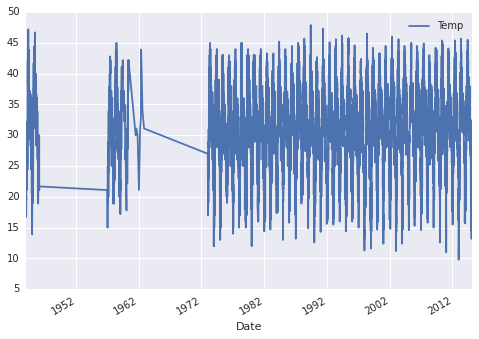

In [10]:
tmax.plot()

or its part:

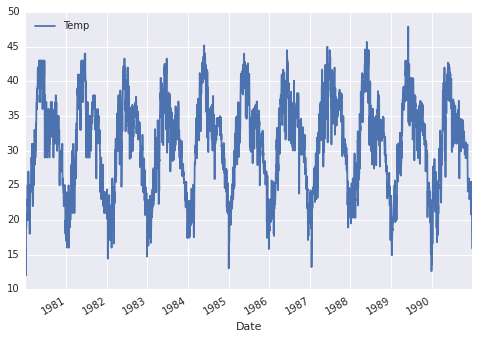

In [11]:
tmax['1980':'1990'].plot()

or even smaller part:

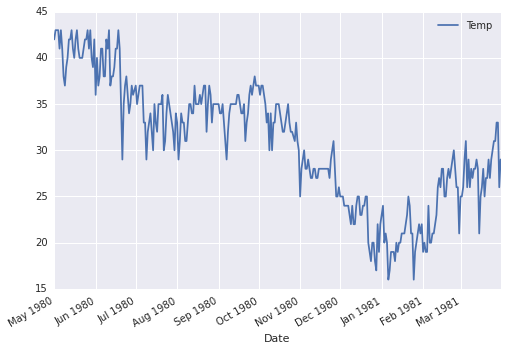

In [12]:
tmax['1980-05':'1981-03'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By index (date in our case): 

In [13]:
tmax['1980-01-02':'1980-01-02']

,Temp
Date,
1980-01-02,16


By exact location:

In [14]:
tmax.iloc[120]

Temp    35
Name: 1944-06-17 00:00:00, dtype: float64

And what if we choose only one month?

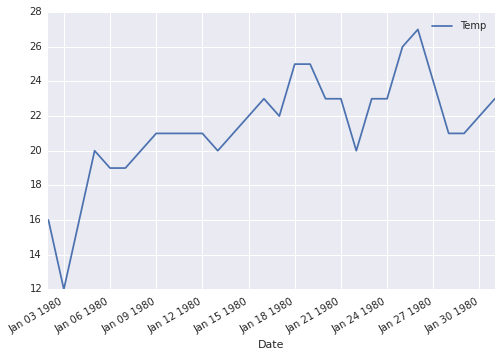

In [15]:
tmax['1980-01'].plot()

Isn't that great? :)

##Exercise

What was temperature in Delhi at your burthsday (or at the closest day)?

## One bonus example :)

This is a plot of all temperatures larger than 35  degrees Celsius. What can we learn from this plot?

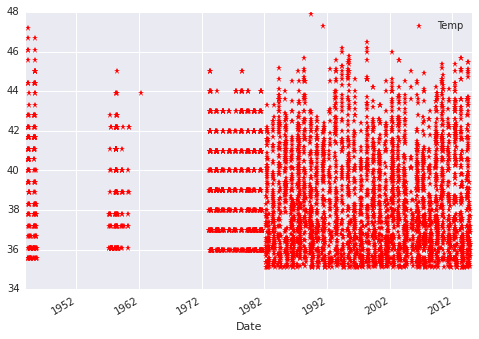

In [16]:
tmax[tmax > 35].plot(style='r*')

## Multiple columns

Now let's make live a bit more interesting and get more data. This will be TMIN time series.

In [17]:
tmin = pd.read_csv('./DelhiTmin.txt',delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)
tmin.columns = ['Date', 'Temp']
tmin = tmin.set_index(['Date'])

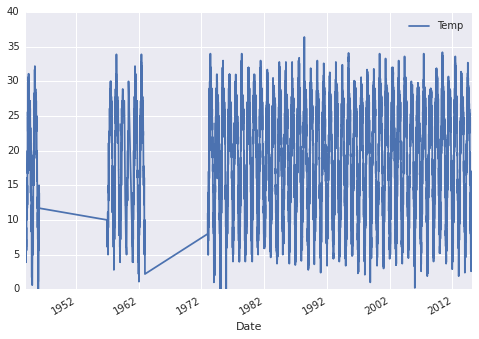

In [18]:
tmin.plot()

Note, that number of values in `tmin` and `tmax` are not the same:

In [19]:
tmin.describe()

,Temp
count,14208.000000
mean,18.530961
std,7.808766
min,0.000000
25%,11.400000
50%,19.500000
75%,25.600000
max,36.400000


In [20]:
tmax.describe()

,Temp
count,15436.000000
mean,31.402131
std,6.740111
min,9.800000
25%,26.200000
50%,32.600000
75%,36.100000
max,47.900000


We are going to create empty DataFrame with indeces for every day and then fill them in with TMIN and TMAX (where they are exist) 

Create index (use period_range):

In [21]:
dd = pd.period_range('1944-01','2015-03',freq='D')

In [22]:
dd

<class 'pandas.tseries.period.PeriodIndex'>
[1944-01-01, ..., 2015-03-01]
Length: 25993, Freq: D

Create empty data frame:

In [23]:
tmp = pd.DataFrame(index=dd)

In [24]:
tmp

""
1944-01-01
1944-01-02
1944-01-03
1944-01-04
1944-01-05
1944-01-06
1944-01-07
...
2015-02-23
2015-02-24


Convert indexes from date time values to periods:

In [25]:
tmin.index = tmin.index.to_period('D')
tmax.index = tmax.index.to_period('D')

Now we create Data Frame, that will contain both TMAX and TMIN data. It is sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [26]:
tmp['TMIN'] = tmin
tmp['TMAX'] = tmax

In [27]:
tmp.head()

,TMIN,TMAX
1944-01-01,NaN,22.2
1944-01-02,5.0,NaN
1944-01-03,3.9,23.9
1944-01-04,5.0,22.2
1944-01-05,6.1,NaN


One can plot the data straight away:

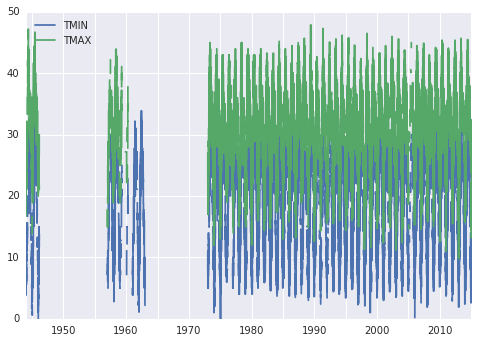

In [28]:
tmp.plot()

We can reference each column by its name:

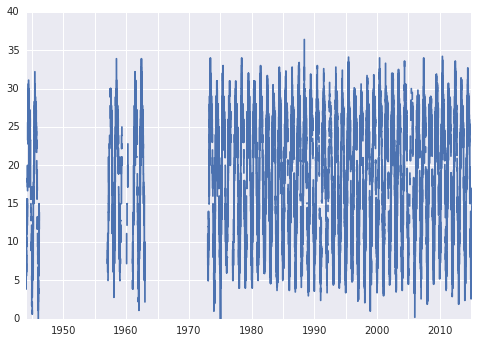

In [29]:
tmp['TMIN'].plot()

or as a method of the Data Frame variable (if name of the variable is a valid python name):

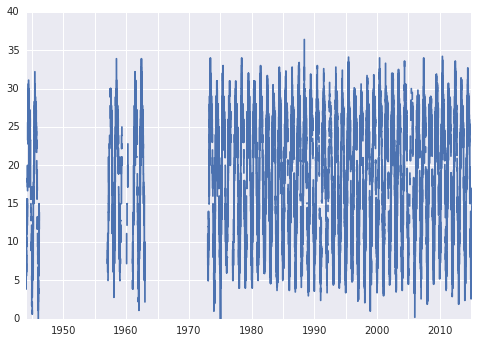

In [30]:
tmp.TMIN.plot()

We can simply add column to the Data Frame:

In [31]:
tmp['Diff'] = tmp['TMAX'] - tmp['TMIN']
tmp.head()

,TMIN,TMAX,Diff
1944-01-01,NaN,22.2,NaN
1944-01-02,5.0,NaN,NaN
1944-01-03,3.9,23.9,20.0
1944-01-04,5.0,22.2,17.2
1944-01-05,6.1,NaN,NaN


##Exercise
Find and plot all differences that are larger than 20

And delete it:

In [33]:
del tmp['Diff']
tmp.tail()

,TMIN,TMAX
2015-02-25,NaN,28.6
2015-02-26,14.5,27.6
2015-02-27,11.1,27.6
2015-02-28,12.6,29.2
2015-03-01,NaN,NaN


Slicing will also work:

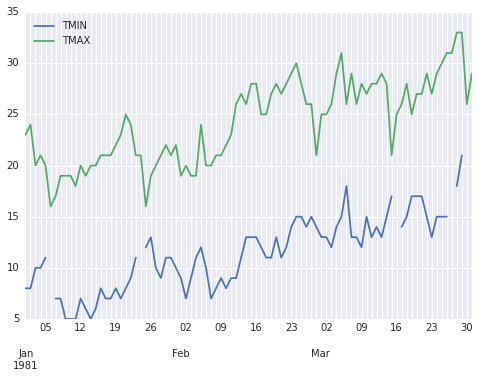

In [34]:
tmp['1981-01':'1981-03'].plot()

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [35]:
tmp.mean()

TMIN    18.530961
TMAX    31.402131
dtype: float64

In [36]:
tmp.max()

TMIN    36.4
TMAX    47.9
dtype: float64

In [37]:
tmp.min()

TMIN    0.0
TMAX    9.8
dtype: float64

You can also do it row-wise:

In [38]:
tmp.mean(1)

1944-01-01    22.2
1944-01-02     5.0
1944-01-03    13.9
1944-01-04    13.6
1944-01-05     6.1
...
2015-02-24    21.90
2015-02-25    28.60
2015-02-26    21.05
2015-02-27    19.35
2015-02-28    20.90
2015-03-01      NaN
Freq: D, Length: 25993

Or get everything at once:

In [39]:
tmp.describe()

,TMIN,TMAX
count,14208.000000,15436.000000
mean,18.530961,31.402131
std,7.808766,6.740111
min,0.000000,9.800000
25%,11.400000,26.200000
50%,19.500000,32.600000
75%,25.600000,36.100000
max,36.400000,47.900000


By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [40]:
tmp.corr()

,TMIN,TMAX
TMIN,1.000000,0.882849
TMAX,0.882849,1.000000


##Exercise
Find mean of all temperatures larger than 5

## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates monthly ('M'):

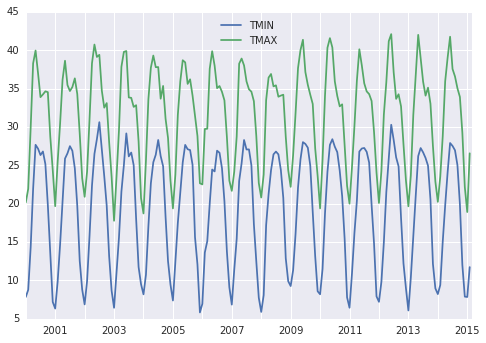

In [41]:
tmp_mm = tmp.resample("M")
tmp_mm['2000':].plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

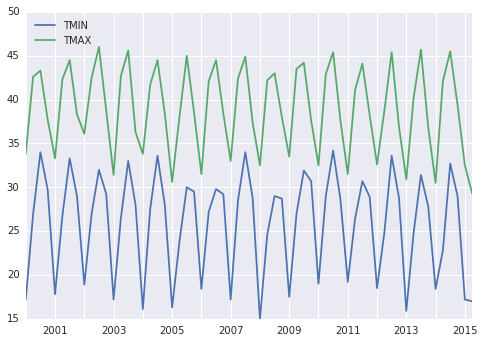

In [42]:
tmp_mm = tmp.resample("3M", how=np.max)
tmp_mm['2000':].plot()

You can specify several functions at once as a list:

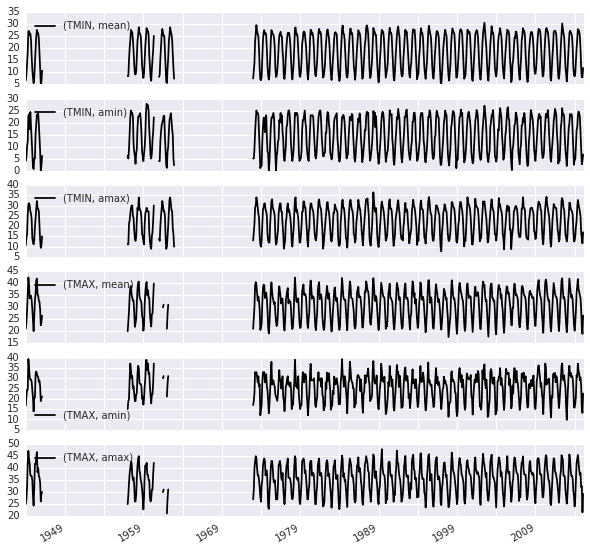

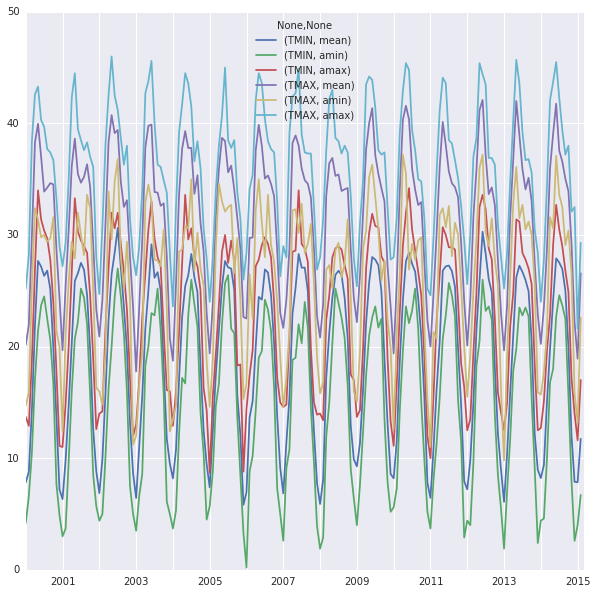

In [43]:
tmp_mm = tmp.resample("M", how=['mean', np.min, np.max])
tmp_mm['1900':'2020'].plot(subplots=True, figsize=(10,10))
tmp_mm['2000':].plot(figsize=(10,10))

##Exercise
Define function that will find difference between maximum and minimum values of the time series, and resample our `tmp` variable with this function.

##Interpolate

Data often have gaps:

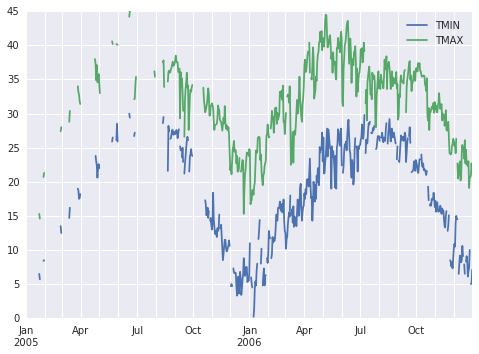

In [44]:
tmp['2005':'2006'].plot()

We can interpolate over this gaps using `interpolate` method:

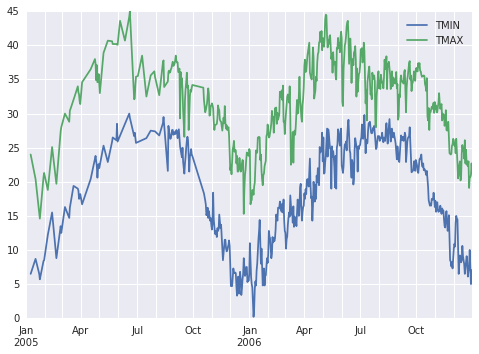

In [45]:
tmp['2005':'2006'].interpolate().plot()

In [51]:
tmp.interpolate?

Interpolation with use of another interpolation method:

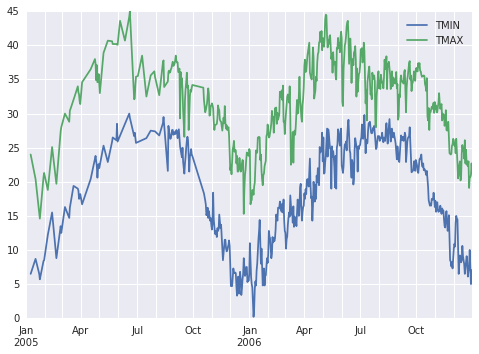

In [46]:
ax = tmp['2005':'2006'].interpolate(method='time').plot()


## Links

[Time Series Data Analysis with pandas (Video)](http://www.youtube.com/watch?v=0unf-C-pBYE)

[Data analysis in Python with pandas (Video)](http://www.youtube.com/watch?v=w26x-z-BdWQ)

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)